In [1]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import random

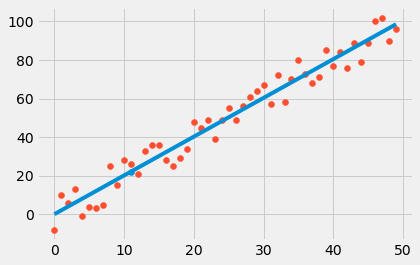

In [2]:

style.use("fivethirtyeight")

def create_dataset(hm, step, variance, correlation=False):
    val = 1
    ys = []
    
    for i in range(hm):
        y = val + random.randrange(-variance, variance)
        ys.append(y)        
        if correlation and correlation =='pos':
            val+=step
        elif correlation and correlation == 'neg':
            val-=step
            
    xs = [i for i in range(hm)]
        
    return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)
    

    
xs, ys = create_dataset(hm=50,step=2, variance = 10,correlation='pos')

def bestFitSlopAndInt(xs,ys):
    m = ((mean(xs)*mean(ys))-(mean(xs*ys))) / (mean(xs)**2 - mean(xs**2))
    
    b = mean(ys) - (m *mean(xs))
    
    return m, b

m, b = bestFitSlopAndInt(xs,ys)

regression_line = [((m*x) + b) for x in xs]

predict_x = 11
predict_y = (m * predict_x) + b


plt.scatter(predict_x, predict_y)
plt.scatter(xs, ys)
plt.plot(xs, regression_line)
plt.show()

In [3]:
def squaredError(y_orig, y_line):
    return sum((y_line - y_orig)**2)

def r_squared(y_orig, y_line):
    y_mean = [mean(y_orig) for y in y_orig]
    sE_Reg = squaredError(ys, regression_line)
    sE_Mean = squaredError(ys, y_mean)
    
    return (1 - (sE_Reg/sE_Mean))

r_squared(ys, regression_line)

    

0.9558595836942426